In [66]:
%matplotlib inline
import sys,os
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import h5py
import pandas as pd
import matplotlib.gridspec as gridspec

### Input data

In [67]:
### Reading the file once more to check
### Extracting the data from the example 'column_data.h5'.  
with h5py.File(f'Final_InputData_4yrs/Validation_data_2019.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    air_temp = np.array(hdf.get('air temperature [K]'))
    wind_speed = np.array(hdf.get('Wind speed at 10 m (m/s)'))
    ppt_rain = np.array(hdf.get('precipitation rain [m s^-1]'))
    rel_hum = np.array(hdf.get('Relative humidity at 5 m (%)'))
    inc_sw = np.array(hdf.get('Incoming shortwave radiation (W/m^2)'))

    #temperature_column = np.array(hdf.get('temperature.cell.0/1600'))


List of datasets in this file: 
 
 ['Incoming shortwave radiation (W', 'Relative humidity at 5 m (%)', 'Soil temperature at - 0.00 m [K]', 'Wind speed at 10 m (m', 'air temperature [K]', 'precipitation rain [m s^-1]', 'time [s]']




In [68]:
time_days = np.arange(0,365,1)

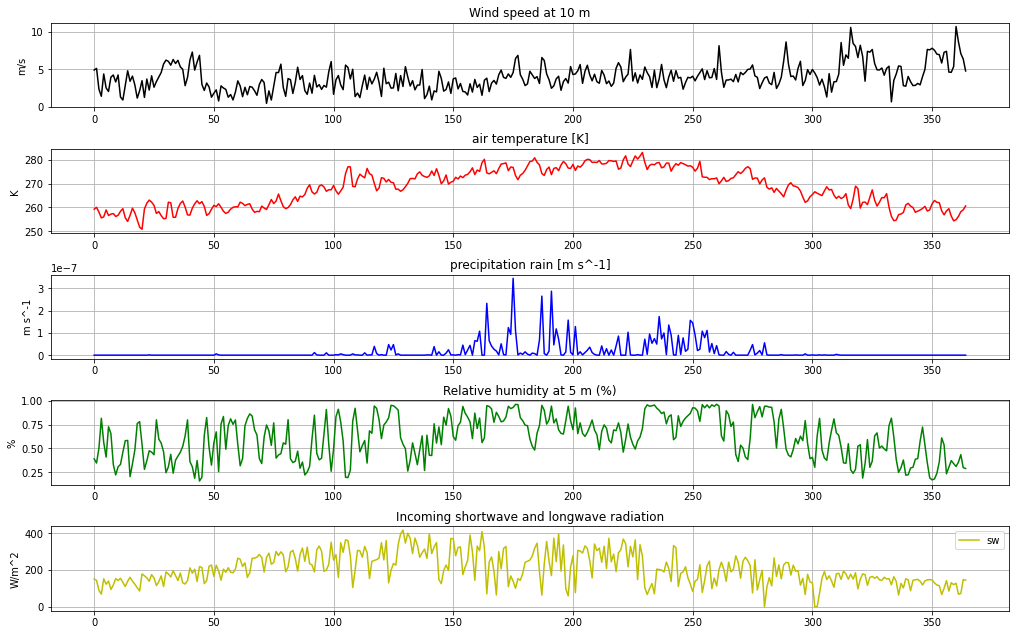

In [69]:
fig2 = plt.figure(figsize=(14,10), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
#f2_ax6 = fig2.add_subplot(spec2[5, 0])

f2_ax1.set_title('Wind speed at 10 m')
f2_ax1.plot(time_days, wind_speed, 'k', label='Wind speed at 10 m (m/s)')
f2_ax1.set_ylabel('m/s')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax1.grid(True)

f2_ax2.set_title('air temperature [K]')
f2_ax2.plot(time_days, air_temp,  'r',label='air temperature [K]')
f2_ax2.set_ylabel('K')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax2.grid(True)

f2_ax3.set_title('precipitation rain [m s^-1]')
f2_ax3.plot(time_days, ppt_rain,  'b',label='precipitation rain [m s^-1]')
f2_ax3.set_ylabel('m s^-1')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax3.grid(True)

f2_ax4.set_title('Relative humidity at 5 m (%)')
f2_ax4.plot(time_days, rel_hum,  'g',label='Relative humidity at 5 m (%)')
f2_ax4.set_ylabel('%')
#f2_ax1.set_xlabel('Date')
#f2_ax1.legend()
f2_ax4.grid(True)

f2_ax5.set_title('Incoming shortwave and longwave radiation')
#f2_ax5.plot(data_AWS_input_final['Incoming longwave radiation (W/m^2)'], 'k',label='lw')
f2_ax5.plot(time_days, inc_sw,  'y',label='sw')
f2_ax5.set_ylabel('W/m^2')
#f2_ax1.set_xlabel('Date')
f2_ax5.legend()
f2_ax5.grid(True)

### Case5_perm_trans_su.demo
- Input file: Case5_perm_transect_final_su.xml

In [70]:
df_sim = pd.read_csv('Case5_perm_trans_su.demo/observations.dat',skiprows=220, sep=',',index_col="time [d]")
df_sim.head()

,water content [mol],surface water content [mol],evaporation [m s^-1],surface-subsurface flux [mol s^-1],surface temperature [K],discharge [mol s^-1],water table depth [m],thaw depth [m],t_(3-2-LeftBD-0.0),t_(3-2-LeftBD-0.8),...,s_(3-43-P1-0.8),s_(3-43-P1-1.6),s_(3-99-P2-0.0),s_(3-99-P2-0.8),s_(3-99-P2-1.6),s_(3-275-P3-0.0),s_(3-275-P3-0.8),s_(3-275-P3-1.6),s_(3-335-SO-0.0),s_(3-335-SO-1.0)
time [d],,,,,,,,,,,,,,,,,,,,,
0.0,1.072105e+08,3.243519e+08,0.000000,0.000000,268.451320,0.0,0.0,0.0,268.451320,268.471132,...,0.276759,0.27676,0.181459,0.276759,0.27676,NaN,0.181464,0.276760,0.181459,0.276760
1.0,1.072105e+08,3.242441e+08,0.012949,-0.000032,267.449716,0.0,0.0,0.0,267.522784,268.460974,...,0.276759,0.27676,0.181247,0.276759,0.27676,NaN,0.181447,0.276760,0.181247,0.276759
2.0,1.072105e+08,3.241551e+08,0.010691,-0.000003,266.436585,0.0,0.0,0.0,266.538137,268.393138,...,0.276758,0.27676,0.181073,0.276756,0.27676,NaN,0.181389,0.276760,0.181073,0.276758
3.0,1.072105e+08,3.240694e+08,0.010310,-0.000005,265.395938,0.0,0.0,0.0,265.517722,268.265191,...,0.276756,0.27676,0.180928,0.276751,0.27676,NaN,0.181311,0.276760,0.180929,0.276755
4.0,1.072105e+08,3.239935e+08,0.009119,-0.000003,264.592929,0.0,0.0,0.0,264.713374,268.082928,...,0.276752,0.27676,0.180833,0.276746,0.27676,NaN,0.181227,0.276759,0.180834,0.276751


In [71]:
df_sim.columns

Index(['water content [mol]', 'surface water content [mol]',
       'evaporation [m s^-1]', 'surface-subsurface flux [mol s^-1]',
       'surface temperature [K]', 'discharge [mol s^-1]',
       'water table depth [m]', 'thaw depth [m]', 't_(3-2-LeftBD-0.0)',
       't_(3-2-LeftBD-0.8)', 't_(3-2-LeftBD-1.6)', 't_(3-43-P1-0.0)',
       't_(3-43-P1-0.8)', 't_(3-43-P1-1.6)', 't_(3-99-P2-0.0)',
       't_(3-99-P2-0.8)', 't_(3-99-P2-1.6)', 't_(3-275-P3-0.0)',
       't_(3-275-P3-0.8)', 't_(3-275-P3-1.6)', 't_(3-335-SO-0.0)',
       't_(3-335-SO-1.0)', 's_(3-2-LeftBD-0.0)', 's_(3-2-LeftBD-0.8)',
       's_(3-2-LeftBD-1.6)', 's_(3-43-P1-0.0)', 's_(3-43-P1-0.8)',
       's_(3-43-P1-1.6)', 's_(3-99-P2-0.0)', 's_(3-99-P2-0.8)',
       's_(3-99-P2-1.6)', 's_(3-275-P3-0.0)', 's_(3-275-P3-0.8)',
       's_(3-275-P3-1.6)', 's_(3-335-SO-0.0)', 's_(3-335-SO-1.0)'],
      dtype='object')

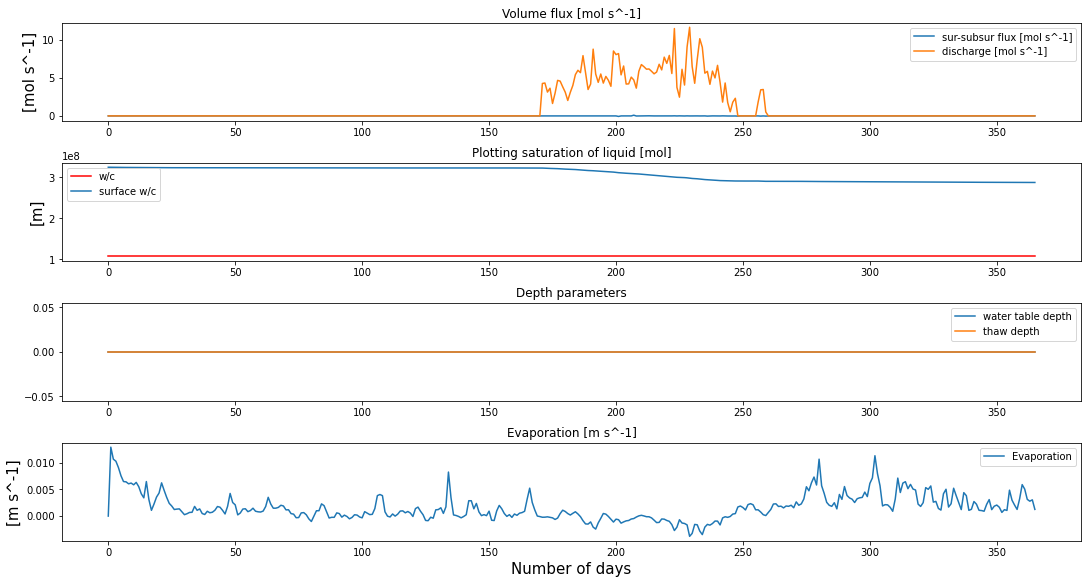

In [72]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, height_ratios=[1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])


f2_ax1.set_title('Volume flux [mol s^-1]')
#plt.plot(df_sim['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_sim['surface-subsurface flux [mol s^-1]'],label='sur-subsur flux [mol s^-1]')
f2_ax1.plot(df_sim['discharge [mol s^-1]'],label='discharge [mol s^-1]')
f2_ax1.legend()
f2_ax1.set_ylabel('[mol s^-1]',fontsize=15)
f2_ax1.legend()


f2_ax2.set_title('Plotting saturation of liquid [mol]')
#plt.plot(df_sim['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_sim['water content [mol]'],'r',label='w/c')
f2_ax2.plot(df_sim['surface water content [mol]'],label='surface w/c')
#f2_ax2.plot(df_sim['snow water content [mol]'],label='snow w/c')
f2_ax2.legend()
f2_ax2.set_ylabel('w/c [mol]',fontsize=15)


f2_ax3.set_title('Depth parameters')
#plt.plot(df_sim['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_sim['water table depth [m]'],label='water table depth')
f2_ax3.plot(df_sim['thaw depth [m]'],label='thaw depth')

#f2_ax3.set_xlabel('Number of days',fontsize=15)
f2_ax2.set_ylabel('[m]',fontsize=15)
f2_ax3.legend()

# Plotting Evaporation
f2_ax4.set_title('Evaporation [m s^-1]')
#plt.plot(df_sim['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_sim['evaporation [m s^-1]'],label='Evaporation')
f2_ax4.set_xlabel('Number of days',fontsize=15)
f2_ax4.set_ylabel('[m s^-1]',fontsize=15)
f2_ax4.legend()

In [73]:
df_sim.columns

Index(['water content [mol]', 'surface water content [mol]',
       'evaporation [m s^-1]', 'surface-subsurface flux [mol s^-1]',
       'surface temperature [K]', 'discharge [mol s^-1]',
       'water table depth [m]', 'thaw depth [m]', 't_(3-2-LeftBD-0.0)',
       't_(3-2-LeftBD-0.8)', 't_(3-2-LeftBD-1.6)', 't_(3-43-P1-0.0)',
       't_(3-43-P1-0.8)', 't_(3-43-P1-1.6)', 't_(3-99-P2-0.0)',
       't_(3-99-P2-0.8)', 't_(3-99-P2-1.6)', 't_(3-275-P3-0.0)',
       't_(3-275-P3-0.8)', 't_(3-275-P3-1.6)', 't_(3-335-SO-0.0)',
       't_(3-335-SO-1.0)', 's_(3-2-LeftBD-0.0)', 's_(3-2-LeftBD-0.8)',
       's_(3-2-LeftBD-1.6)', 's_(3-43-P1-0.0)', 's_(3-43-P1-0.8)',
       's_(3-43-P1-1.6)', 's_(3-99-P2-0.0)', 's_(3-99-P2-0.8)',
       's_(3-99-P2-1.6)', 's_(3-275-P3-0.0)', 's_(3-275-P3-0.8)',
       's_(3-275-P3-1.6)', 's_(3-335-SO-0.0)', 's_(3-335-SO-1.0)'],
      dtype='object')

In [74]:
df_sim['t_(3-275-P3-1.6)']

time [d]
0.0      268.494958
1.0      268.494471
2.0      268.489306
3.0      268.476456
4.0      268.453162
            ...    
361.0    265.043227
362.0    264.977519
363.0    264.906900
364.0    264.831740
365.0    264.753058
Name: t_(3-275-P3-1.6), Length: 366, dtype: float64

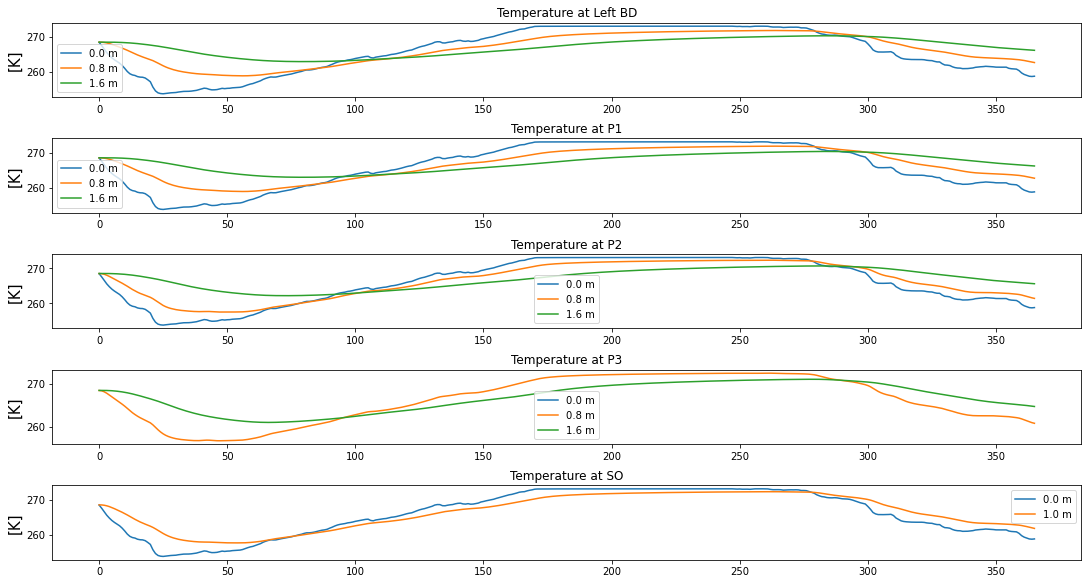

In [75]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])


f2_ax1.set_title('Temperature at Left BD')
#plt.plot(df_sim['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_sim['t_(3-2-LeftBD-0.0)'],label='0.0 m')
f2_ax1.plot(df_sim['t_(3-2-LeftBD-0.8)'],label='0.8 m')
f2_ax1.plot(df_sim['t_(3-2-LeftBD-1.6)'],label='1.6 m')
f2_ax1.legend()
f2_ax1.set_ylabel('[K]',fontsize=15)
f2_ax1.legend()


f2_ax2.set_title('Temperature at P1')
#plt.plot(df_sim['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_sim['t_(3-43-P1-0.0)'],label='0.0 m')
f2_ax2.plot(df_sim['t_(3-43-P1-0.8)'],label='0.8 m')
f2_ax2.plot(df_sim['t_(3-43-P1-1.6)'],label='1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('[K]',fontsize=15)
f2_ax2.legend()


f2_ax3.set_title('Temperature at P2')
#plt.plot(df_sim['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_sim['t_(3-99-P2-0.0)'],label='0.0 m')
f2_ax3.plot(df_sim['t_(3-99-P2-0.8)'],label='0.8 m')
f2_ax3.plot(df_sim['t_(3-99-P2-1.6)'],label='1.6 m')
f2_ax3.legend()
f2_ax3.set_ylabel('[K]',fontsize=15)
f2_ax3.legend()

# 't_(3-275-P3-0.0)'

f2_ax4.set_title('Temperature at P3')
#plt.plot(df_sim['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_sim['t_(3-275-P3-0.0)'],label='0.0 m')
f2_ax4.plot(df_sim['t_(3-275-P3-0.8)'],label='0.8 m')
f2_ax4.plot(df_sim['t_(3-275-P3-1.6)'],label='1.6 m')
f2_ax4.legend()
f2_ax4.set_ylabel('[K]',fontsize=15)
f2_ax4.legend()

f2_ax5.set_title('Temperature at SO')
#plt.plot(df_sim['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax5.plot(df_sim['t_(3-335-SO-0.0)'],label='0.0 m')
f2_ax5.plot(df_sim['t_(3-335-SO-1.0)'],label='1.0 m')
f2_ax5.legend()
f2_ax5.set_ylabel('[K]',fontsize=15)
f2_ax5.legend()

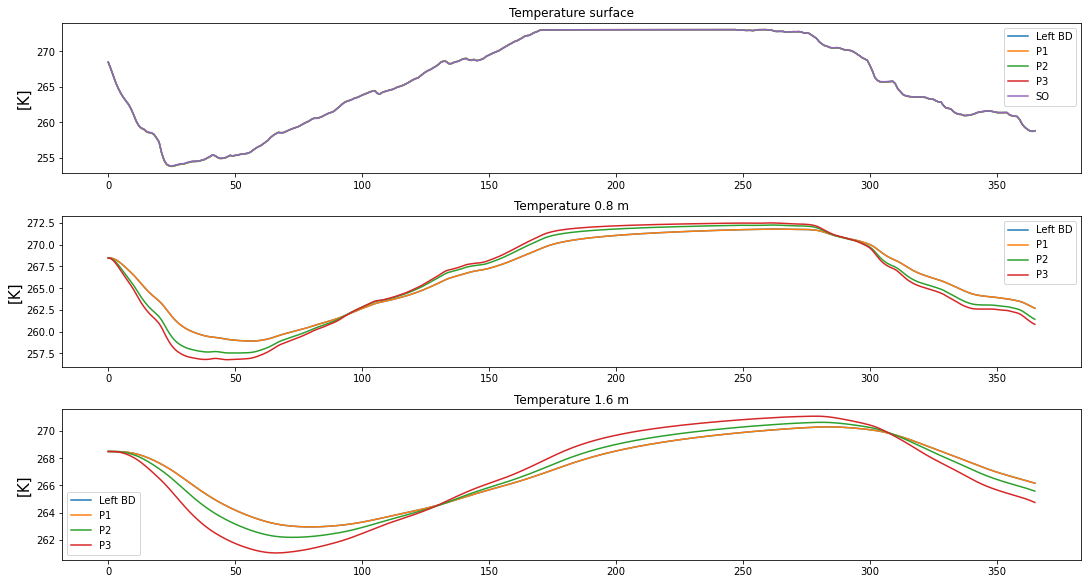

In [76]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=3, height_ratios=[1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])



f2_ax1.set_title('Temperature surface')
#plt.plot(df_sim['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_sim['t_(3-2-LeftBD-0.0)'],label='Left BD')
f2_ax1.plot(df_sim['t_(3-43-P1-0.0)'],label='P1')
f2_ax1.plot(df_sim['t_(3-99-P2-0.0)'],label='P2')
f2_ax1.plot(df_sim['t_(3-275-P3-0.0)'],label='P3')
f2_ax1.plot(df_sim['t_(3-335-SO-0.0)'],label='SO')
f2_ax1.legend()
f2_ax1.set_ylabel('[K]',fontsize=15)
f2_ax1.legend()

f2_ax2.set_title('Temperature 0.8 m')
#plt.plot(df_sim['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_sim['t_(3-2-LeftBD-0.8)'],label='Left BD')
f2_ax2.plot(df_sim['t_(3-43-P1-0.8)'],label='P1')
f2_ax2.plot(df_sim['t_(3-99-P2-0.8)'],label='P2')
f2_ax2.plot(df_sim['t_(3-275-P3-0.8)'],label='P3')
f2_ax2.legend()
f2_ax2.set_ylabel('[K]',fontsize=15)
f2_ax2.legend()


f2_ax3.set_title('Temperature 1.6 m')
#plt.plot(df_sim['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_sim['t_(3-2-LeftBD-1.6)'],label='Left BD')
f2_ax3.plot(df_sim['t_(3-43-P1-1.6)'],label='P1')
f2_ax3.plot(df_sim['t_(3-99-P2-1.6)'],label='P2')
f2_ax3.plot(df_sim['t_(3-275-P3-1.6)'],label='P3')
f2_ax3.legend()
f2_ax3.set_ylabel('[K]',fontsize=15)
f2_ax3.legend()





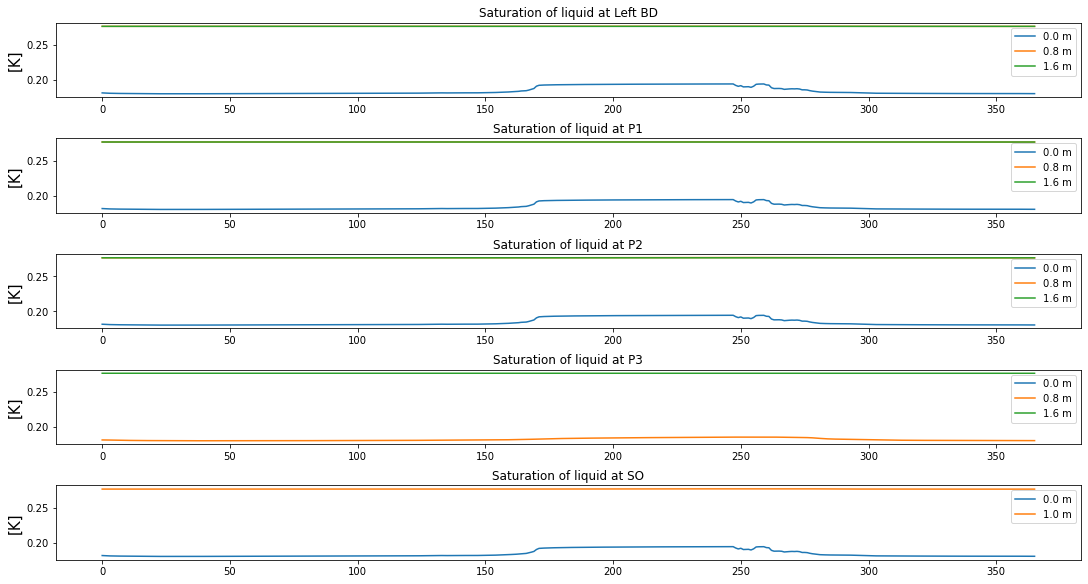

In [77]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the Saturation of liquid for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=5, height_ratios=[1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])


f2_ax1.set_title('Saturation of liquid at Left BD')
#plt.plot(df_sim['point -0.01 Saturation of liquid [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_sim['s_(3-2-LeftBD-0.0)'],label='0.0 m')
f2_ax1.plot(df_sim['s_(3-2-LeftBD-0.8)'],label='0.8 m')
f2_ax1.plot(df_sim['s_(3-2-LeftBD-1.6)'],label='1.6 m')
f2_ax1.legend()
f2_ax1.set_ylabel('[K]',fontsize=15)
f2_ax1.legend()


f2_ax2.set_title('Saturation of liquid at P1')
#plt.plot(df_sim['point -0.01 Saturation of liquid [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_sim['s_(3-43-P1-0.0)'],label='0.0 m')
f2_ax2.plot(df_sim['s_(3-43-P1-0.8)'],label='0.8 m')
f2_ax2.plot(df_sim['s_(3-43-P1-1.6)'],label='1.6 m')
f2_ax2.legend()
f2_ax2.set_ylabel('[K]',fontsize=15)
f2_ax2.legend()


f2_ax3.set_title('Saturation of liquid at P2')
#plt.plot(df_sim['point -0.01 Saturation of liquid [K]'][:1000],label='0.01 m')
f2_ax3.plot(df_sim['s_(3-99-P2-0.0)'],label='0.0 m')
f2_ax3.plot(df_sim['s_(3-99-P2-0.8)'],label='0.8 m')
f2_ax3.plot(df_sim['s_(3-99-P2-1.6)'],label='1.6 m')
f2_ax3.legend()
f2_ax3.set_ylabel('[K]',fontsize=15)
f2_ax3.legend()


f2_ax4.set_title('Saturation of liquid at P3')
#plt.plot(df_sim['point -0.01 Saturation of liquid [K]'][:1000],label='0.01 m')
f2_ax4.plot(df_sim['s_(3-275-P3-0.0)'],label='0.0 m')
f2_ax4.plot(df_sim['s_(3-275-P3-0.8)'],label='0.8 m')
f2_ax4.plot(df_sim['s_(3-275-P3-1.6)'],label='1.6 m')
f2_ax4.legend()
f2_ax4.set_ylabel('[K]',fontsize=15)
f2_ax4.legend()

f2_ax5.set_title('Saturation of liquid at SO')
#plt.plot(df_sim['point -0.01 Saturation of liquid [K]'][:1000],label='0.01 m')
f2_ax5.plot(df_sim['s_(3-335-SO-0.0)'],label='0.0 m')
f2_ax5.plot(df_sim['s_(3-335-SO-1.0)'],label='1.0 m')
f2_ax5.legend()
f2_ax5.set_ylabel('[K]',fontsize=15)
f2_ax5.legend()